# Spam Detector

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [122]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [123]:
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [124]:
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [125]:
# Create the labels set `y` and features DataFrame `X`
y = data["spam"]
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, Length: 4601, dtype: int64

In [126]:
# Create the labels set `y` and features DataFrame `X`
X = data.copy()
X = X.drop(columns="spam")
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [127]:
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [128]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [129]:
X_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1173,0.00,0.00,0.00,0.0,0.00,0.00,1.23,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,1.939,0.000,0.000,1.379,8,40
1954,0.67,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.055,0.000,0.000,0.000,0.000,1.644,13,74
256,0.00,0.00,1.42,0.0,0.71,0.00,0.00,0.71,0.00,0.71,...,0.0,0.000,0.000,0.000,0.931,0.000,0.000,12.055,117,217
3341,0.00,0.00,0.24,0.0,0.09,0.04,0.00,0.00,0.04,0.00,...,0.0,0.014,0.148,0.000,0.014,0.044,0.007,2.112,26,1223
4469,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.500,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.122,0.081,0.000,0.000,0.040,3.891,70,323
466,0.00,0.23,0.00,0.0,0.23,0.47,0.00,0.47,0.00,0.95,...,0.0,0.000,0.121,0.040,0.000,0.040,0.000,3.780,55,189
3092,0.00,0.00,0.00,0.0,1.49,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.229,0.000,0.000,0.000,0.000,2.333,10,49
3772,0.00,0.23,0.00,0.0,0.00,0.23,0.00,0.46,0.00,0.00,...,0.0,0.063,0.063,0.000,0.159,0.000,0.000,1.616,13,173


In [130]:

X_test

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3683,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3
4412,0.71,0.00,0.71,0.0,0.00,0.00,0.00,0.00,0.00,0.71,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.032,2,32
2584,0.00,0.00,0.91,0.0,0.00,0.00,0.00,0.45,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.320,7,103
69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.201,0.000,0.000,0.100,0.000,4.548,59,141
1844,0.00,0.00,0.54,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.188,0.047,0.000,0.000,0.000,1.745,12,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,0.32,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.64,...,0.0,0.000,0.492,0.000,0.000,0.000,0.000,1.890,11,138
1260,0.44,0.00,0.88,0.0,0.44,1.32,0.00,0.00,0.00,0.00,...,0.0,0.222,0.000,0.000,0.444,0.370,0.000,2.413,16,140
801,0.07,0.22,0.82,0.0,0.52,0.00,0.07,0.00,0.67,0.59,...,0.0,0.000,0.095,0.000,0.119,0.071,0.167,3.429,74,974
2698,0.00,0.00,0.00,0.0,7.14,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.600,4,8


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [152]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
# Fit the Standard Scaler with the training data
# Scale the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled


array([[-0.33933373, -0.16214839, -0.55144324, ..., -0.11649103,
        -0.21175305, -0.41909144],
       [ 1.8777157 , -0.16214839, -0.55144324, ..., -0.10814021,
        -0.18841316, -0.35960578],
       [-0.33933373, -0.16214839,  2.2325961 , ...,  0.21993678,
         0.29705664, -0.10941609],
       ...,
       [-0.33933373, -0.16214839, -0.55144324, ..., -0.08642808,
        -0.20241709, -0.40334524],
       [-0.33933373,  0.02143809, -0.55144324, ..., -0.10902256,
        -0.18841316, -0.18639753],
       [-0.00843083, -0.16214839,  0.25239911, ..., -0.09960031,
        -0.1137255 ,  0.10403246]])

In [153]:
# Scale the testing data
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.33933373, -0.16214839, -0.55144324, ..., -0.12843428,
        -0.2444289 , -0.48382584],
       [ 2.01007686, -0.16214839,  0.84057643, ..., -0.12742588,
        -0.23976092, -0.43308807],
       [-0.33933373, -0.16214839,  1.23269465, ..., -0.11835027,
        -0.21642103, -0.30886801],
       ...,
       [-0.1077017 ,  0.01345607,  1.05624145, ..., -0.05189034,
         0.09633355,  1.21501465],
       [-0.33933373, -0.16214839, -0.55144324, ..., -0.10952676,
        -0.23042497, -0.47507794],
       [-0.33933373, -0.16214839, -0.23774866, ..., -0.07788818,
        -0.11839347,  0.83710575]])

In [159]:
scaler = StandardScaler()
scaler.fit(data)
data_train_scaled = scaler.transform(data)
data_train_scaled

array([[-0.34243371,  0.3308849 ,  0.71285877, ...,  0.04529792,
        -0.00872413,  1.24007366],
       [ 0.3453594 ,  0.05190919,  0.43512954, ...,  0.25056283,
         1.22832407,  1.24007366],
       [-0.14592139, -0.16507191,  0.85172339, ...,  2.22110599,
         3.25873251,  1.24007366],
       ...,
       [ 0.64012787, -0.16507191,  0.03837349, ..., -0.23694133,
        -0.27262775, -0.80640371],
       [ 2.80176333, -0.16507191, -0.55676058, ..., -0.24207296,
        -0.33860365, -0.80640371],
       [-0.34243371, -0.16507191,  0.73269658, ..., -0.24207296,
        -0.40128076, -0.80640371]])

In [160]:
# Creating a model and prediction using kmeans
spam_scaled_sales_df=pd.DataFrame(data_train_scaled, columns =['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total','spam'])
spam_scaled_sales_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1.240074
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1.240074
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1.240074
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1.240074
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1.240074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.672880,-0.165072,0.673183,-0.0469,-0.464314,0.781971,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,0.343917,-0.155198,-0.329912,-0.308355,-0.103048,-0.127640,-0.252336,-0.322110,-0.806404
4597,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.102907,-0.308355,-0.103048,-0.114623,-0.247205,-0.444165,-0.806404
4598,0.640128,-0.165072,0.038373,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,0.260533,2.141746,-0.155198,-0.329912,-0.308355,-0.103048,-0.119382,-0.236941,-0.272628,-0.806404
4599,2.801763,-0.165072,-0.556761,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.303450,-0.155198,-0.329912,-0.308355,-0.103048,-0.127483,-0.242073,-0.338604,-0.806404


In [163]:
# Create a a list to store inertia values and the values of k
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(spam_scaled_sales_df)
    inertia.append(k_model.inertia_)
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()    

,k,inertia
0,1,266858.000000
1,2,261968.614540
2,3,242227.204896
3,4,228831.677784
4,5,221804.268257


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

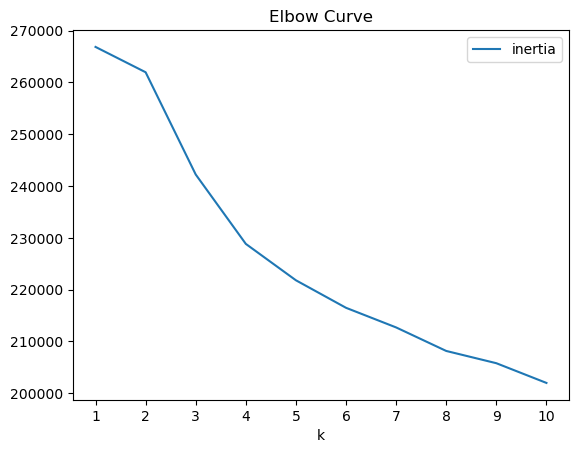

In [164]:
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [180]:
model1 = KMeans(n_clusters=4, n_init='auto', random_state=3)
model1.fit(X_train_scaled, y_train)

KMeans(n_clusters=4, n_init='auto', random_state=3)

In [181]:
train_score = model1.score(X_train_scaled, y_train)
test_score = model1.score(X_test_scaled, y_test)


print("training score:", train_score)
print("sest score:", test_score)


training score: -175818.15452453867
sest score: -64489.251071351246


In [182]:
predictions = model1.predict(X_test_scaled)

# Review the predictions
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [183]:
#The custom build accuracy score
accuracy_score(y_test, predictions)

0.579496090356212

In [168]:
model = KMeans(n_clusters=4, n_init='auto', random_state=3)

# Fit the model
model.fit(spam_scaled_sales_df)

# Make predictions
k_3 = model.predict(spam_scaled_sales_df)

# Create a copy of the preprocessed data
spam_scaled_sales_df_predictions_df = spam_scaled_sales_df.copy()

# Add a class column with the labels
spam_scaled_sales_df_predictions_df['spam2'] = k_3

<Axes: xlabel='word_freq_make', ylabel='spam'>

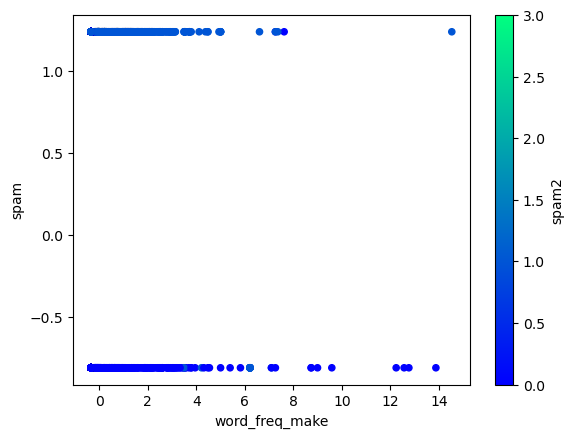

In [169]:
spam_scaled_sales_df_predictions_df.plot.scatter(
    x="word_freq_make",
    y="spam",
    c="spam2",
    colormap="winter")

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [134]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression


In [135]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train_scaled, y_train)
print("training scores", logistic_model.score(X_train_scaled, y_train))
print("testing scores", logistic_model.score(X_test_scaled, y_test))

training scores 0.9257971014492754
testing scores 0.9226759339704604


In [141]:
# Make and save testing predictions with the saved logistic regression model using the test data

# Review the predictions
predictions = logistic_model.predict(X_test_scaled)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [151]:
predictions.dtype

dtype('int64')

In [113]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9226759339704604


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [114]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier


In [118]:
rt=RandomForestClassifier(n_estimators=500, random_state=1)
# Evaluate the model
rrt1=rt.fit(X_train_scaled, y_train)
#rrt2=rt.fit(X_test_encoded_df, y_test_encoded)
print("RandomForestClassifier training scores", rrt1.score(X_train_scaled, y_train))
print("RandomForestClassifier testing scores", rrt1.score(X_test_scaled, y_test))

RandomForestClassifier training scores 0.9994202898550725
RandomForestClassifier testing scores 0.9556907037358818


In [119]:
# Make and save testing predictions with the saved logistic regression model using the test data


# Review the predictions

predictions_random = rrt1.predict(X_test_scaled)
predictions_random

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
predictions_random.info()

In [120]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
acc_score_random = accuracy_score(y_test, predictions_random)
print(f"Accuracy Score : {acc_score_random}")

Accuracy Score : 0.9556907037358818


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

In [ ]:
## Which model performed better? (5 points) 
The Random Forest Classifier Model accuracy score is much more than the LogisRegression model
### How does that compare to your prediction? (5 points)
The Kmeans/Lebow accuracy score for X scaled data is 0.579496090356212 is not so accurate and required compared to random forest and 
logistic regression.
The Random Forest accuracy scire is 0.9582  while the 
Logisregression accuracy score is 0.9226 so Random Forest model is best for the 
above scaled data.